0.9473684210526315
0.9736842105263158


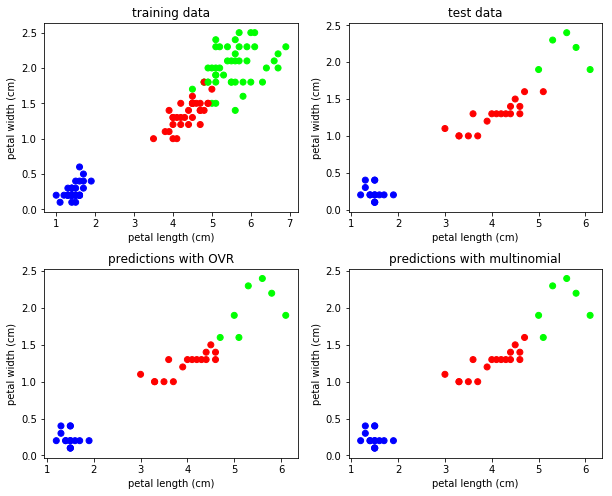

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

plt.figure(figsize=(10,8))
plt.subplots_adjust(hspace=0.3)

iris = load_iris()
X = pd.DataFrame(iris.data)
X.columns = iris.feature_names
y = pd.DataFrame(iris.target)
X_train, X_test, y_train, y_test = train_test_split(X,y)

plt.subplot(2,2,1)
plt.scatter(X_train.iloc[:,2],
            X_train.iloc[:,3],
            c=y_train.values.ravel(),
            cmap='brg')
plt.title("training data")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.subplot(2,2,2)
plt.scatter(X_test.iloc[:,2],
            X_test.iloc[:,3],
            c=y_test.values.ravel(),
            cmap='brg')
plt.title("test data")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

modelOVR = LogisticRegression(solver='lbfgs',
                              multi_class='ovr',
                              max_iter=300)
modelOVR.fit(X_train, y_train.values.ravel())
print(modelOVR.score(X_test,y_test))
y_predOVR = modelOVR.predict(X_test)
plt.subplot(2,2,3)
plt.scatter(X_test.iloc[:,2],
            X_test.iloc[:,3],
            c=y_predOVR,
            cmap='brg')
plt.title("predictions with OVR")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

modelMN = LogisticRegression(solver='lbfgs',
                             multi_class='multinomial',
                             max_iter=300)
modelMN.fit(X_train, y_train.values.ravel())
print(modelMN.score(X_test,y_test))
y_predMN = modelMN.predict(X_test)
plt.subplot(2,2,4)
plt.scatter(X_test.iloc[:,2],
            X_test.iloc[:,3],
            c=y_predMN,
            cmap='brg')
plt.title("predictions with multinomial")
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.show()